<a href="https://colab.research.google.com/github/varshagayke/ML_algorithms/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the data
# Assume the CSV has at least two columns: "YearsExperience" and "Salary"
df = pd.read_csv('/content/Salary_dataset.csv')   # change the path/filename if needed

In [23]:
# 2. Examine the data
print(df.head())
print(df.describe())
print(df.info())

# Optionally, check for missing values
print("Missing values per column:")
print(df.isnull().sum())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30

In [24]:
# 3. Prepare the features/target
X = df[['YearsExperience']]    # independent variable(s) — needs to be 2D
y = df['Salary']               # dependent variable


In [25]:
# 4. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
# 5. Create & Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:

# 6. Make predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [28]:
# 7. Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training set: MSE = {:.2f}, R^2 = {:.2f}".format(mse_train, r2_train))
print("Test set:     MSE = {:.2f}, R^2 = {:.2f}".format(mse_test, r2_test))

Training set: MSE = 27102249.73, R^2 = 0.96
Test set:     MSE = 49830096.86, R^2 = 0.90


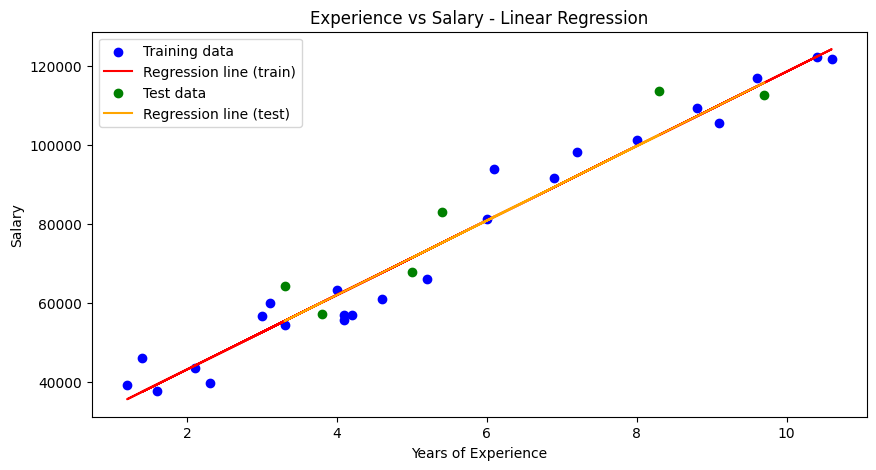

In [29]:
# 8. Visualize results
plt.figure(figsize=(10,5))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred, color='red', label='Regression line (train)')

# Plot test data
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_test, y_test_pred, color='orange', label='Regression line (test)')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary - Linear Regression')
plt.legend()
plt.show()

In [30]:
# 9. Output the learned equation
coef = regressor.coef_[0]
intercept = regressor.intercept_
print("Linear equation: Salary = {:.2f} * YearsExperience + {:.2f}".format(coef, intercept))


Linear equation: Salary = 9423.82 * YearsExperience + 24380.20


In [31]:
# 10. Predict for new / example data
years_new = np.array([[3.5], [7.2], [10]])   # for example
salary_preds = regressor.predict(years_new)
for yrs, sal in zip(years_new.flatten(), salary_preds):
    print(f"For {yrs} years of experience -> predicted salary = {sal:.2f}")

For 3.5 years of experience -> predicted salary = 57363.56
For 7.2 years of experience -> predicted salary = 92231.67
For 10.0 years of experience -> predicted salary = 118618.35


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
